In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import colors,cm
from scipy import stats
import dispersion_utils as utils
from datetime import timedelta, date
import os
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [2]:
home_folder = "/nethome/manra003/analysis/dispersion/simulations/"
output_folder = "/nethome/manra003/analysis/dispersion/outputs/"

min_lat, max_lat = -35, -15
min_lon, max_lon = 10, 20

months = [str(x).zfill(2) for x in range(1,13)]
years = np.arange(2010,2022)

dvm_types=['DVM_s', 'DVM', 'DVM_d']
compare_modes=['2D', '3D', 'sinking']
dvm_type_labels=['DVM I','DVM II', 'DVM III']

p_total = 104636    #total number of particles per simulation
t_days=100  #length of simulation in days
threshold_dist = 100    # km-  mesoscale


<h3> Prepare CDF plots of days when threshold distance of 100 km was crossed </h3>
<p>Load data from outputs of previous runs of above cells

In [3]:
dpi = 300
# color = cm.YlGnBu #
color = cm.magma_r
scatter_size = .3

spring_ind = [8, 9, 10]
summer_ind = [11, 0, 1]
autumn_ind = [2, 3, 4]
winter_ind = [5, 6, 7]

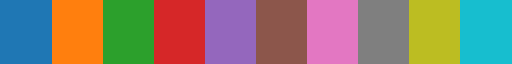

In [4]:
cmap = plt.get_cmap('tab10')
new_cmap = colors.ListedColormap(cmap(np.arange(10)))
new_cmap

In [16]:
def plot_mean_std(ax, cdfs, l, c, text_size=12):
    sigma =1
    mean = np.nanmean(cdfs, axis=0)
    std = np.nanstd(cdfs, axis=0)
    ax.plot(mean, label=l, color=c)
    # ax.plot(mean - sigma*std, linestyle = '--', linewidth = 0.8, color=c)
    # ax.plot(mean + sigma*std, linestyle = '--', linewidth = 0.8, color=c)
    ax.fill_between(np.arange(0, 100), mean - sigma*std, mean + sigma*std, alpha=0.2)
    ax.tick_params(axis='both', labelsize=text_size)
    ax.axhline(y=0.5, c='darkgray', xmin=0, xmax=100, linewidth=2, linestyle='--', zorder=-1)



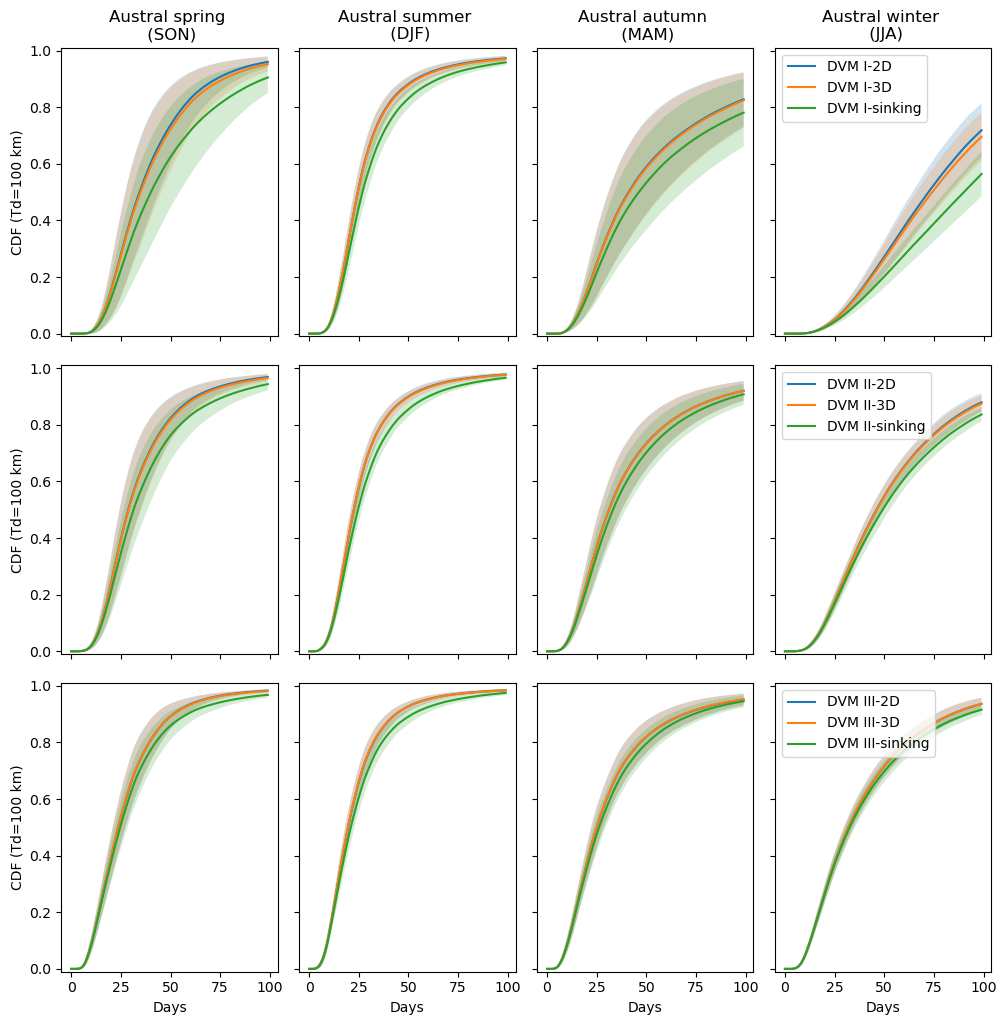

In [12]:
# years=[2010]
# compare_modes = ['2D', '3D']
dvm_type_labels=['DVM I','DVM II', 'DVM III']
spring_cdf = np.zeros((len(years)*3, t_days))
summer_cdf = np.zeros(spring_cdf.shape)
autumn_cdf = np.zeros(spring_cdf.shape)
winter_cdf = np.zeros(spring_cdf.shape)

fig, axs = plt.subplots(nrows=len(dvm_types), ncols=4, sharex=True, sharey=True, figsize=(12,12), dpi=dpi)
for i, dvm_mode in enumerate(dvm_types):
    for mode in compare_modes:
        for index, year in enumerate(years):
            cdf_data = np.load(output_folder+"CDF/{0}-{1}/all_CDF_{0}_{1}_{2}_tc{3}km.npy".format(dvm_mode, mode, year, threshold_dist))
            spring_cdf[index*3:index*3+3, :] = cdf_data[spring_ind, :t_days]
            summer_cdf[index*3:index*3+3, :] = cdf_data[summer_ind, :t_days]
            autumn_cdf[index*3:index*3+3, :] = cdf_data[autumn_ind, :t_days]
            winter_cdf[index*3:index*3+3, :] = cdf_data[winter_ind, :t_days]
            
        plot_mean_std(axs[i, 0], spring_cdf, str(dvm_type_labels[i]+'-'+mode), new_cmap(i))
        plot_mean_std(axs[i, 1], summer_cdf, str(dvm_type_labels[i]+'-'+mode), new_cmap(i))
        plot_mean_std(axs[i, 2], autumn_cdf, str(dvm_type_labels[i]+'-'+mode), new_cmap(i))
        plot_mean_std(axs[i, 3], winter_cdf, str(dvm_type_labels[i]+'-'+mode), new_cmap(i))

    axs[i, 0].set_ylabel("CDF (Td=100 km)")
    axs[i, 3].legend(loc="upper left")

    

axs[0, 0].set_title("Austral spring \n (SON)")
axs[0, 1].set_title("Austral summer \n (DJF)")
axs[0, 2].set_title("Austral autumn \n (MAM)")
axs[0, 3].set_title("Austral winter \n (JJA)")
axs[2, 0].set_xlabel("Days")
axs[2, 1].set_xlabel("Days")
axs[2, 2].set_xlabel("Days")
axs[2, 3].set_xlabel("Days")


axs[0][0].set_ylim(-0.01,1.01)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

In [7]:
total_mean = np.mean(cdf_data, axis=0)[:-1]
total_std = np.nanstd(cdf_data, axis=0)[:-1]

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title("Total CDF mean 2010: {0}-{1}".format("DVM", "3D"))

plt.plot(total_mean)
plt.fill_between(np.arange(0,100), total_mean - total_std, total_mean + total_std, alpha=0.2)

plt.xlabel("Days")
plt.ylabel("CDF")
plt.ylim(-0.01, 1.01)
plt.legend()

NameError: name 'cdf_data' is not defined

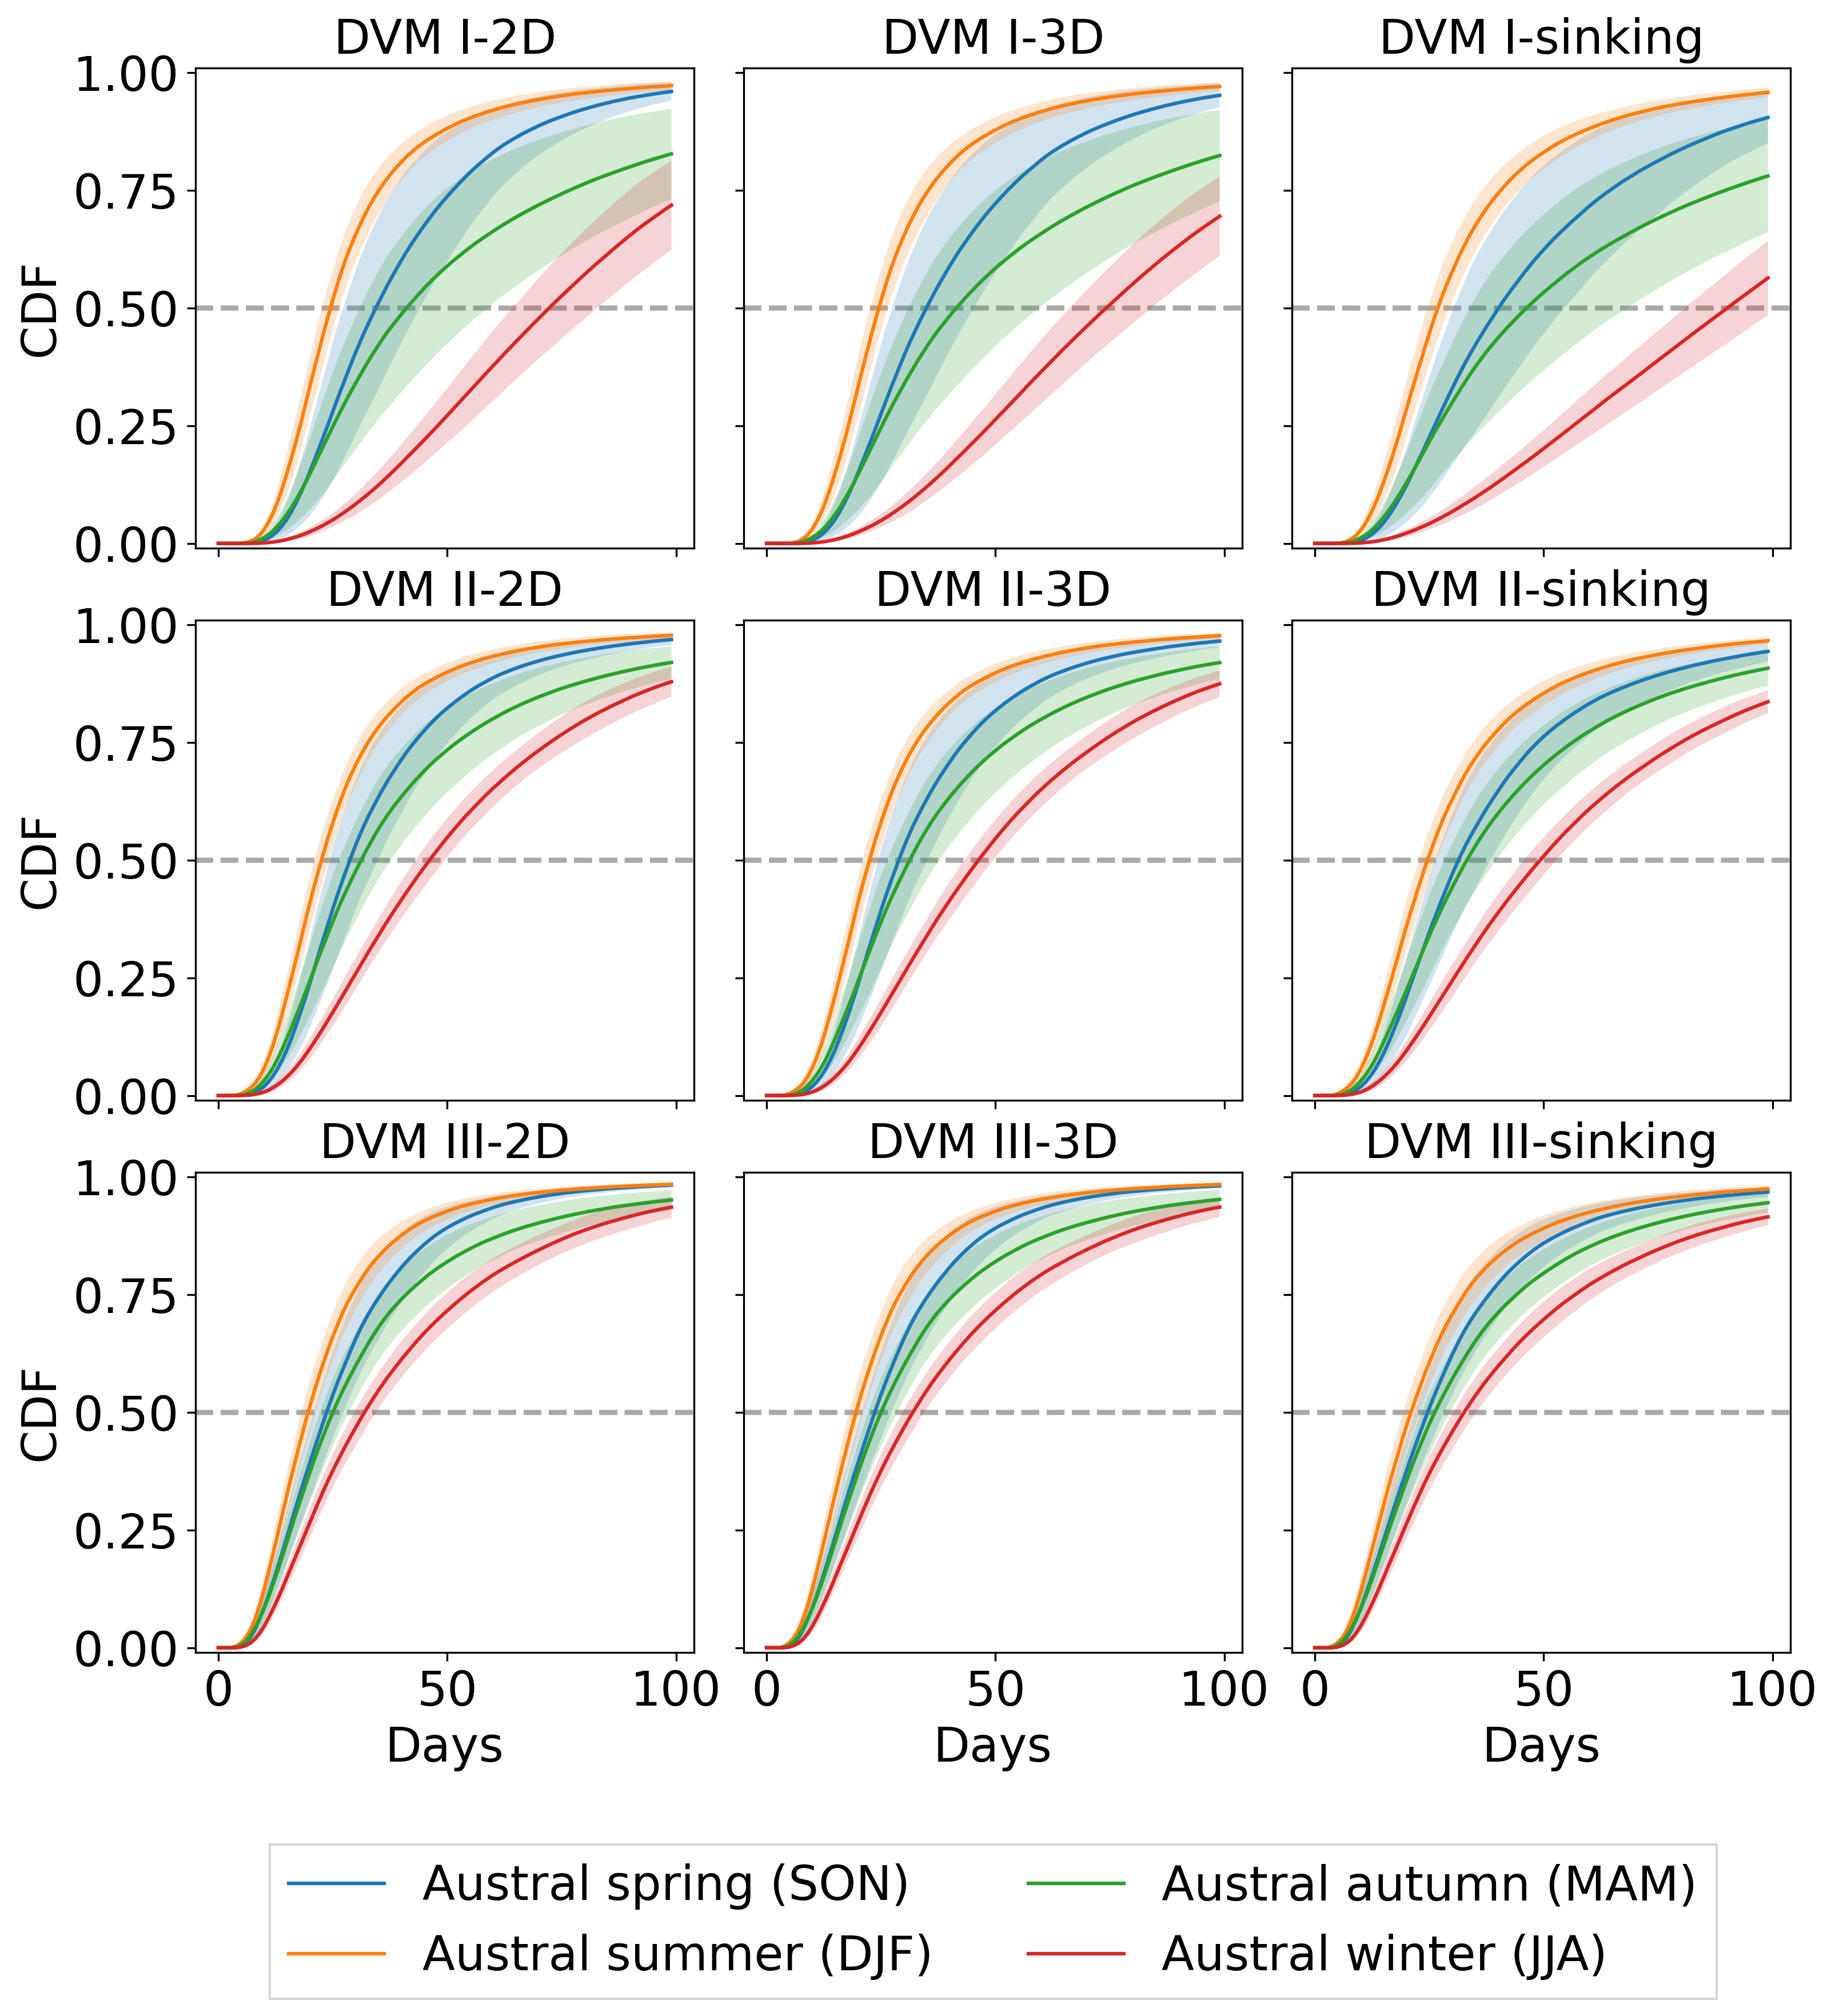

In [18]:
text_size=20 # for print- size = 24, or size 15
spring_cdf = np.zeros((len(years)*3, t_days))
summer_cdf = np.zeros(spring_cdf.shape)
autumn_cdf = np.zeros(spring_cdf.shape)
winter_cdf = np.zeros(spring_cdf.shape)

fig, axs = plt.subplots(nrows=len(dvm_types), ncols=3, sharex=True, sharey=True, figsize=(12,12), dpi=dpi)
for i, dvm_mode in enumerate(dvm_types):
    for j,mode in enumerate(compare_modes):
        for index, year in enumerate(years):
            cdf_data = np.load(output_folder+"CDF/{0}-{1}/all_CDF_{0}_{1}_{2}_tc{3}km.npy".format(dvm_mode, mode, year, threshold_dist))
            spring_cdf[index*3:index*3+3, :] = cdf_data[spring_ind, :t_days]
            summer_cdf[index*3:index*3+3, :] = cdf_data[summer_ind, :t_days]
            autumn_cdf[index*3:index*3+3, :] = cdf_data[autumn_ind, :t_days]
            winter_cdf[index*3:index*3+3, :] = cdf_data[winter_ind, :t_days]
            
        plot_mean_std(axs[i, j], spring_cdf, "Austral spring (SON)",new_cmap(0), text_size)
        plot_mean_std(axs[i, j], summer_cdf, "Austral summer (DJF)",new_cmap(1), text_size)
        plot_mean_std(axs[i, j], autumn_cdf, "Austral autumn (MAM)",new_cmap(2), text_size)
        plot_mean_std(axs[i, j], winter_cdf, "Austral winter (JJA)",new_cmap(3), text_size) 
        axs[i, j].set_title(str(dvm_type_labels[i]+'-'+mode), fontsize=text_size)

    axs[i, 0].set_ylabel("CDF", fontsize=text_size)
    
axs[2, 0].set_xlabel("Days", fontsize=text_size)
axs[2, 1].set_xlabel("Days", fontsize=text_size)
axs[2, 2].set_xlabel("Days", fontsize=text_size)
# axs[2, 2].legend(loc="lower right", fontsize=text_size)

axs[2, 1].legend(loc='upper center', fontsize=text_size, bbox_to_anchor=(0.5, -0.35),fancybox=False, shadow=False, ncol=2)

axs[0][0].set_ylim(-0.01,1.01)
plt.subplots_adjust(hspace=0.15, wspace=0.1)

<h2>Part 3: Separation distance over time 

In [5]:
def plot_mean_std_dist(ax, cdfs, l, c):
    sigma = 1
    mean = np.nanmean(cdfs, axis=(0,2))
    std = np.nanstd(cdfs, axis=(0,2))
    ax.plot(mean, label=l, color=c)
    # ax.plot(mean - sigma*std, linestyle = '--', linewidth = 0.8, color=c)
    # ax.plot(mean + sigma*std, linestyle = '--', linewidth = 0.8, color=c)
    ax.fill_between(np.arange(0, 100), mean - sigma*std, mean + sigma*std, alpha=0.2)

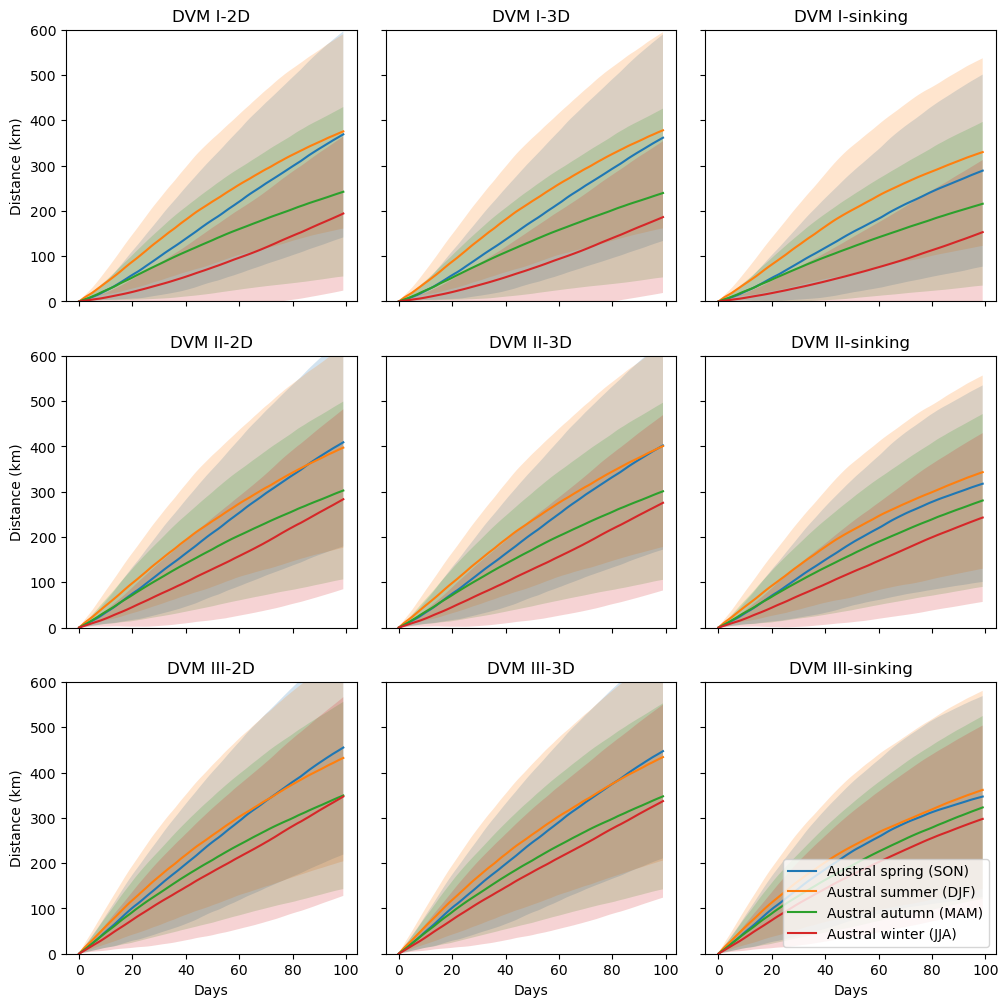

In [8]:
spring_dist = np.zeros((p_total, t_days, len(years)*3))
summer_dist = np.zeros(spring_dist.shape)
autumn_dist = np.zeros(spring_dist.shape)
winter_dist = np.zeros(spring_dist.shape)
years=[2020, 2021]


fig, axs = plt.subplots(nrows=len(dvm_types), ncols=3, sharex=True, sharey=True, figsize=(12,12), dpi=dpi)
for i, dvm_mode in enumerate(dvm_types):
    for j,mode in enumerate(compare_modes):
        for index, year in enumerate(years):
            dist_data = np.load(output_folder+"Distances/{0}-{1}/all_sep_array_{0}_{1}_{2}_tc{3}km.npy".format(dvm_mode, mode, year, threshold_dist))
            spring_dist[:, :, index*3:index*3+3] = dist_data[:, :t_days, spring_ind]
            summer_dist[:, :, index*3:index*3+3] = dist_data[:, :t_days, summer_ind]
            autumn_dist[:, :, index*3:index*3+3] = dist_data[:, :t_days, autumn_ind]
            winter_dist[:, :, index*3:index*3+3] = dist_data[:, :t_days, winter_ind]
            
        plot_mean_std_dist(axs[i, j], spring_dist, "Austral spring (SON)",new_cmap(0))
        plot_mean_std_dist(axs[i, j], summer_dist, "Austral summer (DJF)",new_cmap(1))
        plot_mean_std_dist(axs[i, j], autumn_dist, "Austral autumn (MAM)",new_cmap(2))
        plot_mean_std_dist(axs[i, j], winter_dist, "Austral winter (JJA)",new_cmap(3)) 
        axs[i, j].set_title(str(dvm_type_labels[i]+'-'+mode))

    axs[i, 0].set_ylabel("Distance (km)")
    
axs[2, 0].set_xlabel("Days")
axs[2, 1].set_xlabel("Days")
axs[2, 2].set_xlabel("Days")
axs[2, 2].legend(loc="lower right")

axs[0][0].set_ylim(-0.01,600)
plt.subplots_adjust(hspace=0.2, wspace=0.1)

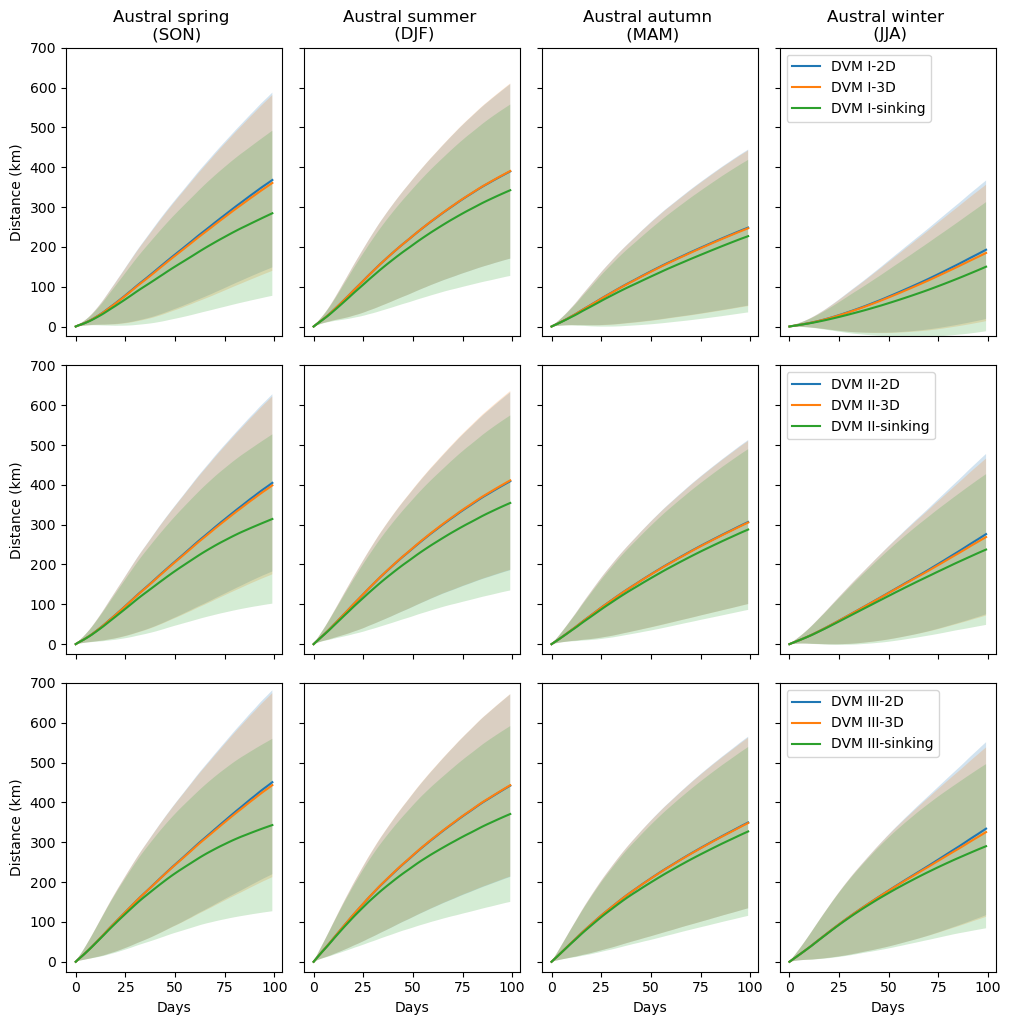

In [9]:
# def plot_percentile(ax, distances, l):
#     percentile_values = np.nanmean(distances, axis=(0,2))
#     min_value=np.nanmin(distances, axis=(0,2))
#     max_value=np.nanmax(distances, axis=(0,2))

#     ax.plot(percentile_values, label=l)
#     ax.plot(min_value,color='pink')
#     ax.plot(max_value,color='gold')

years=np.arange(2010,2022)
spring_dist = np.zeros((p_total, t_days, len(years)*3))
summer_dist = np.zeros(spring_dist.shape)
autumn_dist = np.zeros(spring_dist.shape)
winter_dist = np.zeros(spring_dist.shape)

fig, axs = plt.subplots(nrows=len(dvm_types), ncols=4, sharex=True, sharey=True, figsize=(12,12))

for i, dvm_mode in enumerate(dvm_types):
    for j, mode in enumerate(compare_modes):
        for index, year in enumerate(years):
            dist_data = np.load(output_folder+"Distances/{0}-{1}/all_sep_array_{0}_{1}_{2}_tc{3}km.npy".format(dvm_mode, mode, year, threshold_dist))
            spring_dist[:, :, index*3:index*3+3] = dist_data[:, :t_days, spring_ind]
            summer_dist[:, :, index*3:index*3+3] = dist_data[:, :t_days, summer_ind]
            autumn_dist[:, :, index*3:index*3+3] = dist_data[:, :t_days, autumn_ind]
            winter_dist[:, :, index*3:index*3+3] = dist_data[:, :t_days, winter_ind]
            
        # plot_percentile(axs[i, 0], spring_dist, str(dvm_mode+'-'+mode))
        # plot_percentile(axs[i, 1], summer_dist, str(dvm_mode+'-'+mode))
        # plot_percentile(axs[i, 2], autumn_dist, str(dvm_mode+'-'+mode))
        # plot_percentile(axs[i, 3], winter_dist, str(dvm_mode+'-'+mode))
        plot_mean_std_dist(axs[i, 0], spring_dist, str(dvm_type_labels[i]+'-'+mode), new_cmap(j))
        plot_mean_std_dist(axs[i, 1], summer_dist, str(dvm_type_labels[i]+'-'+mode), new_cmap(j))
        plot_mean_std_dist(axs[i, 2], autumn_dist, str(dvm_type_labels[i]+'-'+mode), new_cmap(j))
        plot_mean_std_dist(axs[i, 3], winter_dist, str(dvm_type_labels[i]+'-'+mode), new_cmap(j)) 

    axs[i, 0].set_ylabel("Distance (km)")
    axs[i, 3].legend(loc="upper left")
    

axs[0, 0].set_title("Austral spring \n (SON)")
axs[0, 1].set_title("Austral summer \n (DJF)")
axs[0, 2].set_title("Austral autumn \n (MAM)")
axs[0, 3].set_title("Austral winter \n (JJA)")
axs[2, 0].set_xlabel("Days")
axs[2, 1].set_xlabel("Days")
axs[2, 2].set_xlabel("Days")
axs[2, 3].set_xlabel("Days")


axs[0][0].set_ylim(-25,700)
plt.subplots_adjust(hspace=0.1, wspace=0.1)


# took 11 minutes to compute for all years

<h2> Part 3- Plots of dispersion time for a given threshold distance.</h2>
Load the separation distance array again to compute the the days.

In [5]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

In [6]:
# load release locations
project_data_path = '/nethome/manra003/atlanteco_plankton_plastic_nutrients_dispersion/data/'
coords = pd.read_csv(
        project_data_path + 'Benguela_release_points_1ov32_641x_321ygrid.csv')

year=2021

/nethome/manra003/analysis/dispersion/outputs/Distances/DVM-2D/all_sep_array_DVM_2D_2017_tc100km.npy
9 October 2017
0 January 2017
3 April 2017
6 July 2017
/nethome/manra003/analysis/dispersion/outputs/Distances/DVM-3D/all_sep_array_DVM_3D_2017_tc100km.npy
9 October 2017
0 January 2017
3 April 2017
6 July 2017
/nethome/manra003/analysis/dispersion/outputs/Distances/DVM-sinking/all_sep_array_DVM_sinking_2017_tc100km.npy
9 October 2017
0 January 2017
3 April 2017
6 July 2017


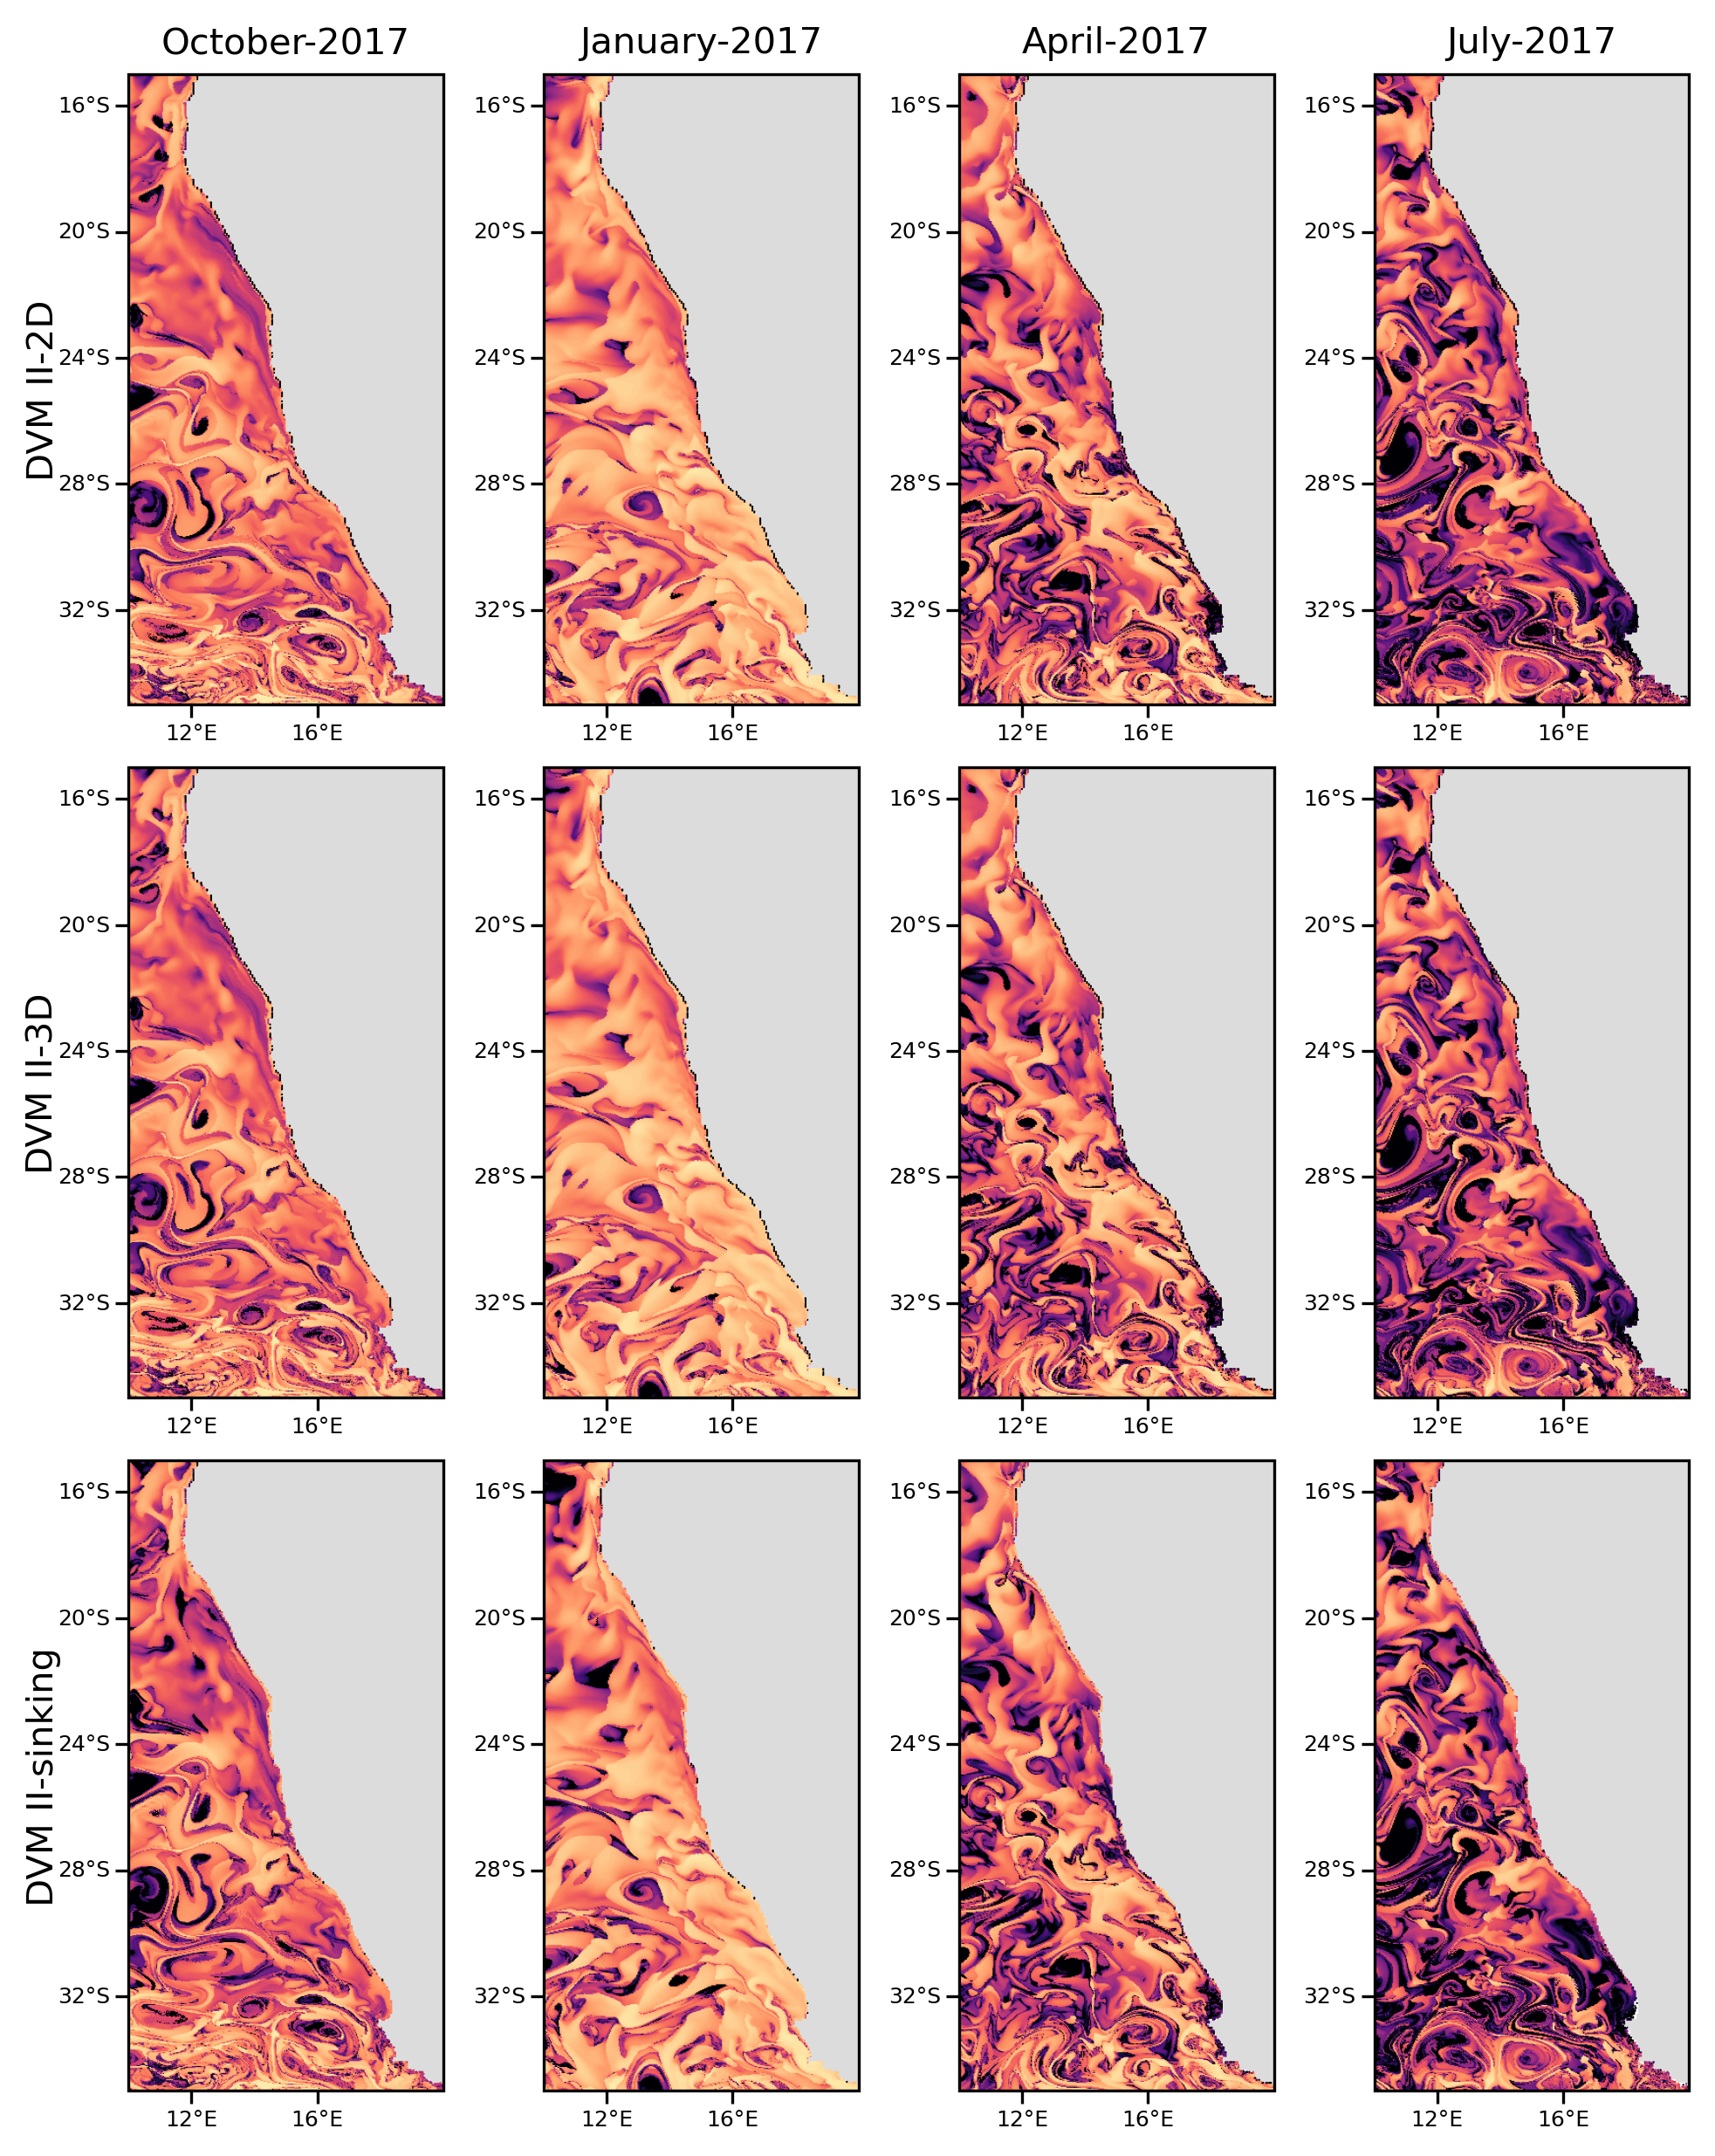

In [28]:

custom_size=10
ticks_size=6
dpi=300
fig, axes = plt.subplots(figsize=(8,10), dpi=dpi, nrows=3, ncols=4, subplot_kw={'projection': ccrs.PlateCarree()})

def mapplot_days(ax, array, threshold_dist):
    x_ticks=np.arange(12,20,4)
    y_ticks=np.arange(-36,-14,4)
    gl = ax.gridlines(draw_labels=True)
    gl.xlines = False
    gl.xlocator = mticker.FixedLocator(x_ticks)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylines = False
    gl.ylocator = mticker.FixedLocator(y_ticks)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': ticks_size, 'color': 'k'}
    gl.ylabel_style = {'size': ticks_size, 'color': 'k'}
    colormap = colors.ListedColormap(['gainsboro', 'white'])

    ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)

    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)
    ax.tick_params(axis='both',labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    ax.scatter(coords['Longitude'], coords['Latitude'], c= utils.threshold_days(array, threshold_dist), s=scatter_size, cmap=color, vmin=0, vmax=100, marker='o',edgecolors='none')

select_months=[9, 0, 3, 6]
dvm_mode_index = 1
for i, mode in enumerate(compare_modes):
    file=output_folder+"Distances/{0}-{1}/all_sep_array_{0}_{1}_{2}_tc{3}km.npy".format(dvm_types[dvm_mode_index], mode, year, threshold_dist)
    print(file)
    dist_data = np.load(file)
    axes[i,0].set_ylabel(str(dvm_type_labels[dvm_mode_index]+'-'+mode), rotation=90, labelpad=15, fontsize=custom_size)
    for j, mon in enumerate(select_months):
        mon_name = date(1900, mon+1, 1).strftime('%B')
        print(mon, mon_name, year)
        mapplot_days(axes[i, j], dist_data[:,:,mon], threshold_dist)
        # axes[i,j].text(0.9,0.9,mon_name)
        axes[0,j].set_title(mon_name+'-'+str(year), fontsize=custom_size)

# cbar=fig.colorbar(im, ax=ax, label='Days', extend='max')
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.savefig(output_folder+"Figures/DVMII_vs_others_ThresholdDays_100km_2017.pdf")


In [14]:
file=output_folder+"Distances/{0}-{1}/all_sep_array_{0}_{1}_{2}_tc{3}km.npy".format('DVM_d', '2D', year, threshold_dist)
print(file)
dist_data = np.load(file)
month_index= 0

/nethome/manra003/analysis/dispersion/outputs/Distances/DVM_d-2D/all_sep_array_DVM_d_2D_2021_tc100km.npy


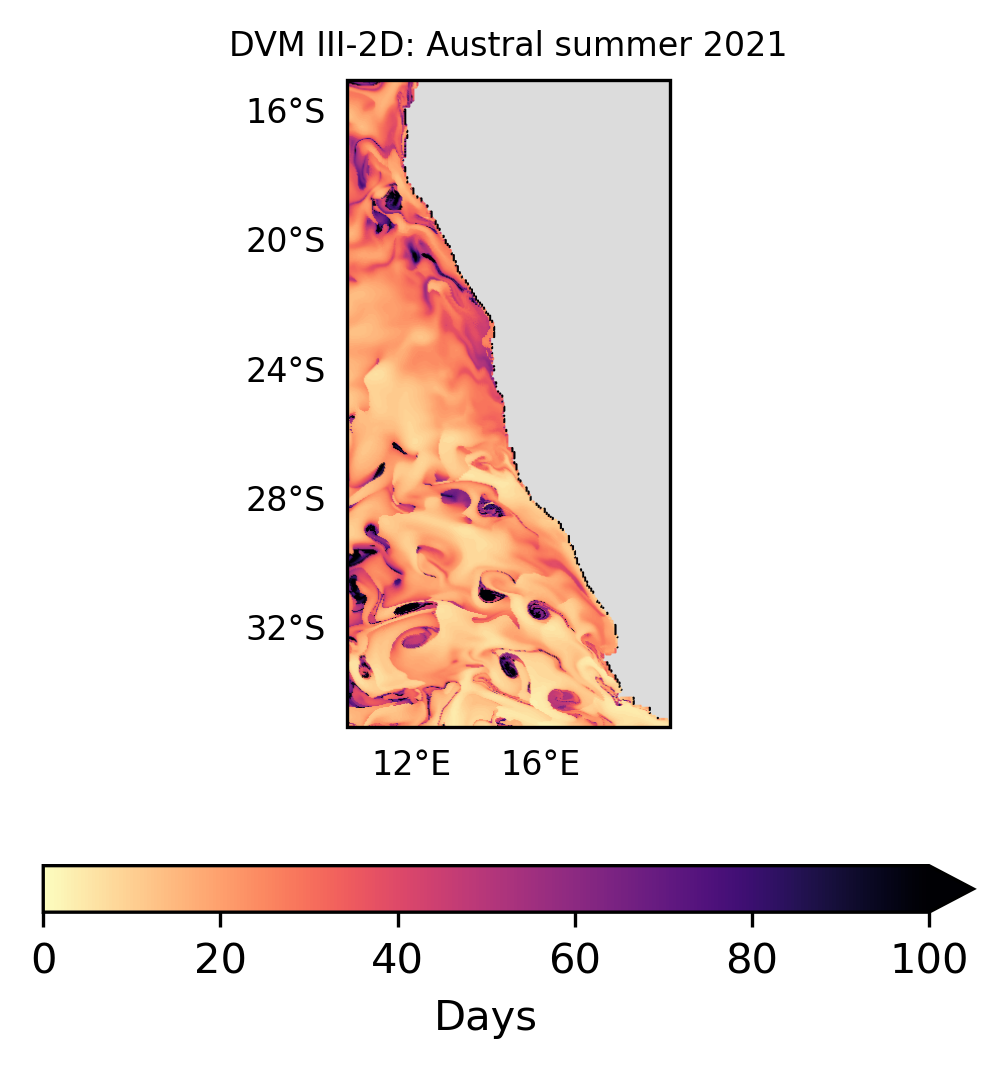

In [15]:
custom_size, ticks_size = 8,8
pre_text = "DVM III-2D: Austral summer {0}".format(year)

fig = plt.figure(figsize=(4, 4), dpi=dpi)
ax = plt.axes(projection=ccrs.PlateCarree())
x_ticks = np.arange(12, 20, 4)
y_ticks = np.arange(-36, -14, 4)
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.xlocator = mticker.FixedLocator(x_ticks)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = False
gl.ylocator = mticker.FixedLocator(y_ticks)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': ticks_size, 'color': 'k'}
gl.ylabel_style = {'size': ticks_size, 'color': 'k'}
colormap = colors.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750,
              1499:], mask_land[0, 0, 1250:1750, 1500:], cmap=colormap)
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
# ax.set_xlim(12,16)
# ax.set_ylim(-29,-25)
plt.title(pre_text, fontsize=custom_size)

# plt.title("Days when {0} and {1} particles separate a distance of {2} km: {3} {4}".format(type1, type2, threshold_dist, months[id], year), fontsize=10)
im = ax.scatter(coords['Longitude'], coords['Latitude'], c=utils.threshold_days(
    dist_data[:, :, month_index], threshold_dist), s=scatter_size, cmap=color, vmin=0, vmax=100, marker='o', edgecolors='none')
cbar = fig.colorbar(im, ax=ax, label='Days', extend='max', orientation='horizontal')

plt.show()

In [ ]:
diff= np.random.uniform(0,100,50)
print(stats.describe(diff, axis= None, nan_policy='omit'))
count, _ = np.histogram(diff, bins=bins)

pdf = count/np.sum(count)

cdf = np.cumsum(pdf)
count,len(count), np.sum(count), cdf

DescribeResult(nobs=50, minmax=(0.44245729351130025, 99.26102823167663), mean=48.751026186341875, variance=1321.8708322705897, skewness=0.12255995095740319, kurtosis=-1.5861476052453445)


(array([8, 2, 2, 4, 1, 2, 4, 2, 2, 2, 0, 0, 0, 1, 1, 1, 6, 2, 3, 7, 0]),
 21,
 50,
 array([0.16, 0.2 , 0.24, 0.32, 0.34, 0.38, 0.46, 0.5 , 0.54, 0.58, 0.58,
        0.58, 0.58, 0.6 , 0.62, 0.64, 0.76, 0.8 , 0.86, 1.  , 1.  ]))

In [ ]:

print(stats.describe(diff, axis= None, nan_policy='omit'))
count, _ = np.histogram(diff, bins=bins)
pdf = count/len(diff)
cdf = np.cumsum(pdf)
count,len(count), np.sum(count), cdf

DescribeResult(nobs=50, minmax=(0.44245729351130025, 99.26102823167663), mean=48.751026186341875, variance=1321.8708322705897, skewness=0.12255995095740319, kurtosis=-1.5861476052453445)


(array([8, 2, 2, 4, 1, 2, 4, 2, 2, 2, 0, 0, 0, 1, 1, 1, 6, 2, 3, 7, 0]),
 21,
 50,
 array([0.16, 0.2 , 0.24, 0.32, 0.34, 0.38, 0.46, 0.5 , 0.54, 0.58, 0.58,
        0.58, 0.58, 0.6 , 0.62, 0.64, 0.76, 0.8 , 0.86, 1.  , 1.  ]))

In [ ]:

diff[20:30]=-100
print(stats.describe(diff, axis= None, nan_policy='omit'))
count, _ = np.histogram(diff, bins=bins)

pdf = count/len(diff)
cdf = np.cumsum(pdf)
count,len(count), np.sum(count), cdf

DescribeResult(nobs=50, minmax=(-100.0, 99.26102823167663), mean=17.31998875055717, variance=4575.760913363393, skewness=-0.6760176254546071, kurtosis=-0.6761137794884906)


(array([7, 2, 1, 4, 1, 1, 4, 2, 1, 1, 0, 0, 0, 1, 0, 1, 5, 2, 2, 5, 0]),
 21,
 40,
 array([0.14, 0.18, 0.2 , 0.28, 0.3 , 0.32, 0.4 , 0.44, 0.46, 0.48, 0.48,
        0.48, 0.48, 0.5 , 0.5 , 0.52, 0.62, 0.66, 0.7 , 0.8 , 0.8 ]))